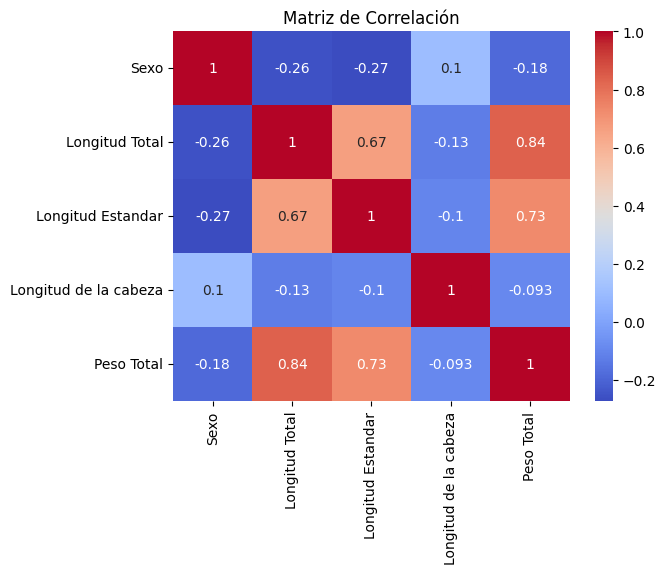

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', sep=";")
df.describe()

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


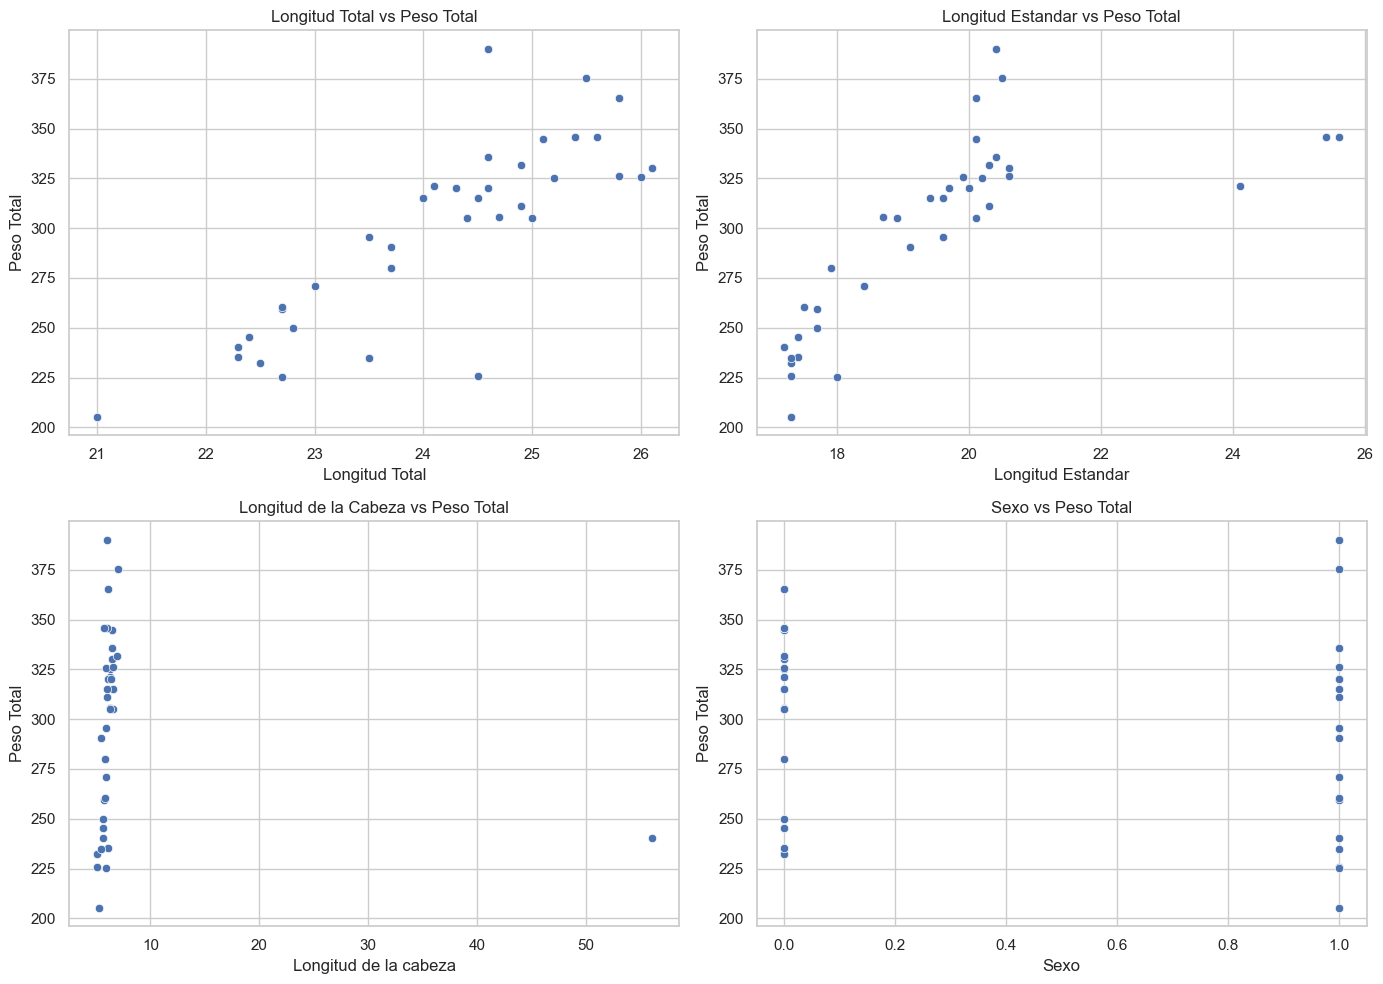

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df
# Setting up the plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=data, x='Longitud Total', y='Peso Total', ax=axes[0, 0])
axes[0, 0].set_title('Longitud Total vs Peso Total')

sns.scatterplot(data=data, x='Longitud Estandar', y='Peso Total', ax=axes[0, 1])
axes[0, 1].set_title('Longitud Estandar vs Peso Total')

sns.scatterplot(data=data, x='Longitud de la cabeza', y='Peso Total', ax=axes[1, 0])
axes[1, 0].set_title('Longitud de la Cabeza vs Peso Total')

sns.scatterplot(data=data, x='Sexo', y='Peso Total', ax=axes[1, 1])
axes[1, 1].set_title('Sexo vs Peso Total')

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
from sklearn.utils import resample

data = pd.read_csv('data.csv', delimiter=';')
number_of_records = data.shape[0]
new_samples_size = int(number_of_records * 5.5)
# Aplicando bootstrapping para crear nuevas muestras
new_samples = resample(data, n_samples=new_samples_size, random_state=0)

augmented_data = pd.concat([data, new_samples])
print(augmented_data.head())
print(f"Tamaño del conjunto de datos aumentado: {augmented_data.shape[0]}")
augmented_data.describe()



   Sexo  Longitud Total  Longitud Estandar  Longitud de la cabeza  Peso Total
0     0            23.7               17.9                    5.8      280.03
1     0            24.7               18.7                    6.3      305.36
2     0            24.4               18.9                    6.6      305.07
3     1            23.0               18.4                    5.9      270.78
4     1            22.7               17.7                    5.7      259.40
Tamaño del conjunto de datos aumentado: 468


,Sexo,Longitud Total,Longitud Estandar,Longitud de la cabeza,Peso Total
count,468.000000,468.000000,468.000000,468.000000,468.000000
mean,0.495726,24.120085,19.440171,6.242735,296.796645
std,0.500517,1.267271,1.982884,3.295401,45.471588
min,0.000000,21.000000,17.200000,5.100000,205.350000
25%,0.000000,23.000000,17.700000,5.700000,259.400000
50%,0.000000,24.400000,19.600000,6.000000,305.360000
75%,1.000000,25.000000,20.300000,6.400000,326.310000
max,1.000000,26.100000,25.600000,56.000000,390.020000


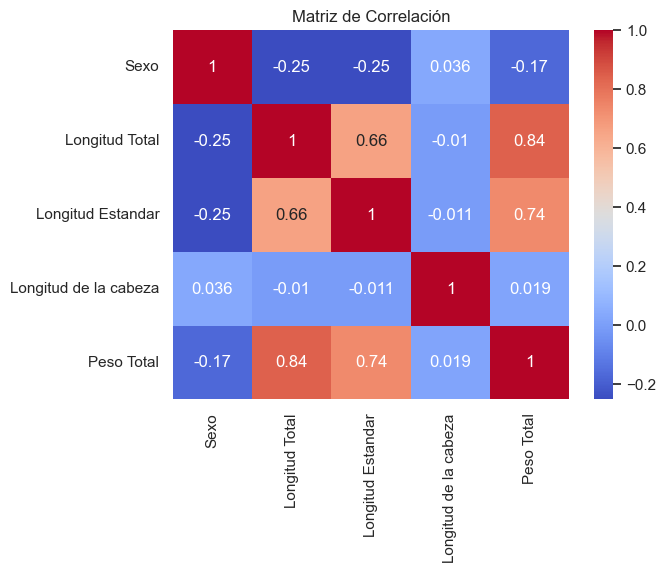

In [21]:
correlation_matrix = augmented_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

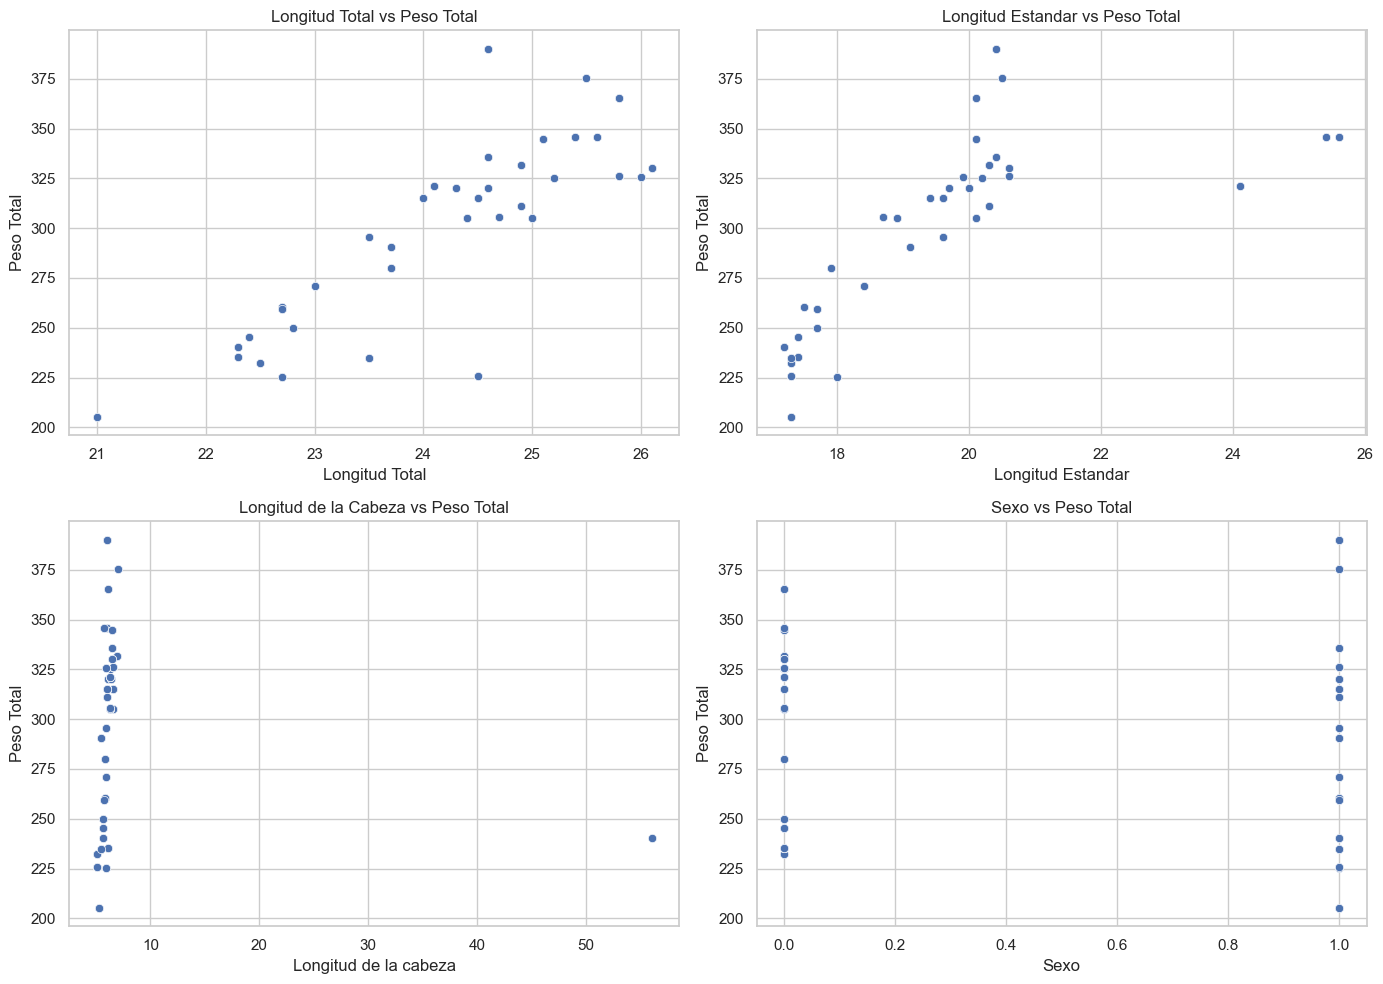

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

data = augmented_data
# Setting up the plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=data, x='Longitud Total', y='Peso Total', ax=axes[0, 0])
axes[0, 0].set_title('Longitud Total vs Peso Total')

sns.scatterplot(data=data, x='Longitud Estandar', y='Peso Total', ax=axes[0, 1])
axes[0, 1].set_title('Longitud Estandar vs Peso Total')

sns.scatterplot(data=data, x='Longitud de la cabeza', y='Peso Total', ax=axes[1, 0])
axes[1, 0].set_title('Longitud de la Cabeza vs Peso Total')

sns.scatterplot(data=data, x='Sexo', y='Peso Total', ax=axes[1, 1])
axes[1, 1].set_title('Sexo vs Peso Total')

# Adjust layout
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = df
X = data[['Longitud Total', 'Longitud Estandar']]
y = data['Peso Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)




Error Cuadrático Medio (MSE): 323.908521682899
Coeficiente de Determinación (R²): 0.8420519100819279
Coeficientes: [22.83907917  7.41312603]
Intercepto: -398.3717915166829


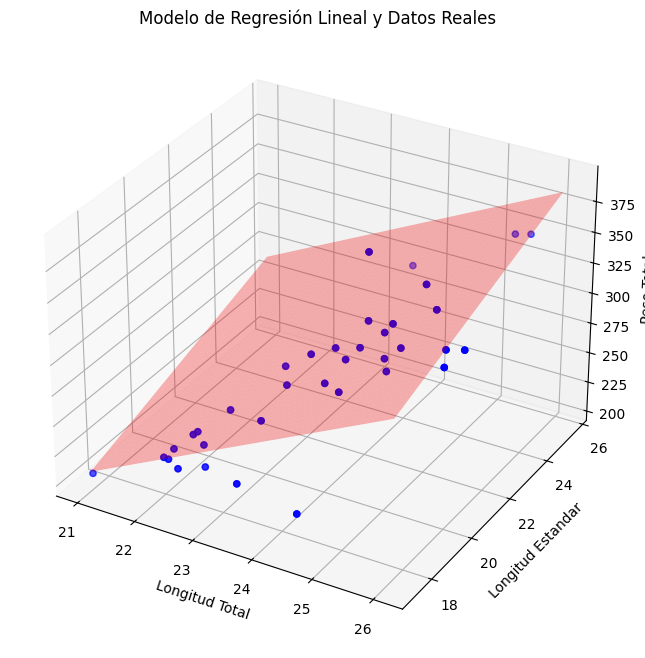

In [5]:
model.fit(X, y)
y_pred_entire_dataset = model.predict(X)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Longitud Total'], data['Longitud Estandar'], data['Peso Total'], color='blue', label='Datos Reales')
x_surf, y_surf = np.meshgrid(np.linspace(data['Longitud Total'].min(), data['Longitud Total'].max(), 100),
                             np.linspace(data['Longitud Estandar'].min(), data['Longitud Estandar'].max(), 100))
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel('Longitud Total')
ax.set_ylabel('Longitud Estandar')
ax.set_zlabel('Peso Total')
ax.set_title('Modelo de Regresión Lineal y Datos Reales')

# Show the plot
plt.show()


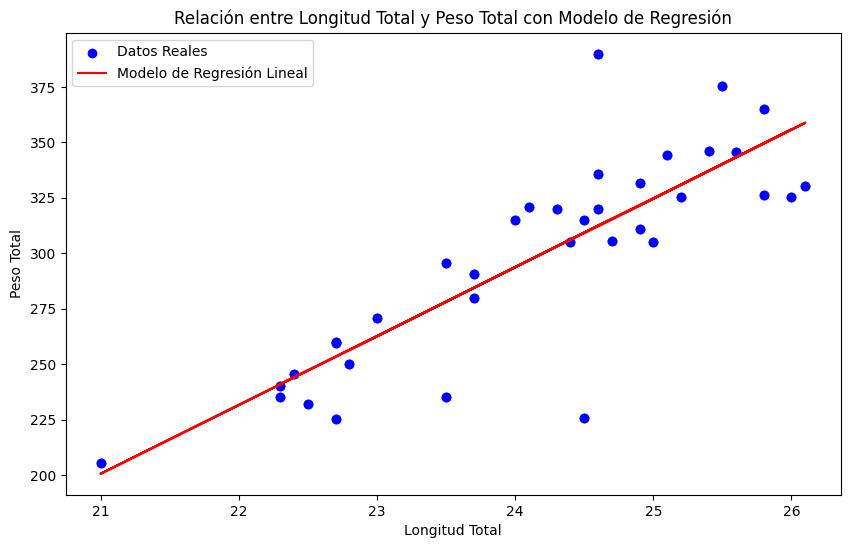

In [6]:
X_single = data[['Longitud Total']]
model_single = LinearRegression()
model_single.fit(X_single, y)
y_pred_single = model_single.predict(X_single)

plt.figure(figsize=(10, 6))
plt.scatter(data['Longitud Total'], data['Peso Total'], color='blue', label='Datos Reales')
plt.plot(data['Longitud Total'], y_pred_single, color='red', label='Modelo de Regresión Lineal')
plt.xlabel('Longitud Total')
plt.ylabel('Peso Total')
plt.title('Relación entre Longitud Total y Peso Total con Modelo de Regresión')
plt.legend()
plt.show()
